In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate Synthetic Dataset
num_customers = 1000
data = {
    'Age': np.random.randint(18, 70, num_customers),
    'Tenure': np.random.randint(1, 120, num_customers),  # in months
    'MonthlyCharges': np.random.uniform(20, 150, num_customers),
    'TotalCharges': lambda df: df['MonthlyCharges'] * df['Tenure'],
    'SupportCalls': np.random.randint(0, 10, num_customers),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], num_customers),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], num_customers),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], num_customers),
    'Churn': np.random.choice([0, 1], num_customers, p=[0.75, 0.25])  # 25% churn rate
}
df = pd.DataFrame(data)
df['TotalCharges'] = df['TotalCharges'](df)  # Calculate TotalCharges

# Encode categorical features
df['InternetService'] = df['InternetService'].astype('category').cat.codes
df['Contract'] = df['Contract'].astype('category').cat.codes
df['PaymentMethod'] = df['PaymentMethod'].astype('category').cat.codes

# Step 2: Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 3: Feature Importance using Random Forest
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Display classification report
print(classification_report(y_test, y_pred))

# Feature Importance Plot
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance for Churn Prediction')
plt.ylabel('Importance')
plt.show()

# Step 4: Cluster At-Risk Customers
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='Tenure', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Clusters by Monthly Charges and Tenure')
plt.show()

# Step 5: Propose Retention Strategies
top_predictors = feature_importances.head(5)
print("\nTop Churn Predictors:")
print(top_predictors)

print("\nRetention Ideas:")
if 'MonthlyCharges' in top_predictors.index:
    print("- Offer discounted plans or flexible payment options for high spenders.")
if 'Tenure' in top_predictors.index:
    print("- Introduce loyalty rewards or contract renewal incentives for long-term customers.")
if 'SupportCalls' in top_predictors.index:
    print("- Improve customer support and resolve issues proactively for frequent support users.")
if 'InternetService' in top_predictors.index:
    print("- Promote bundled services or upgrade options for DSL and Fiber optic users.")
if 'Contract' in top_predictors.index:
    print("- Encourage long-term contracts with benefits to reduce month-to-month churn.")


TypeError: 'Series' object is not callable

In [2]:
pip install pandas numpy seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


/var/folders/xd/3dgxjd2d299bq1s_nztnyl0m0000gn/T/ipykernel_2853/1344173142.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")


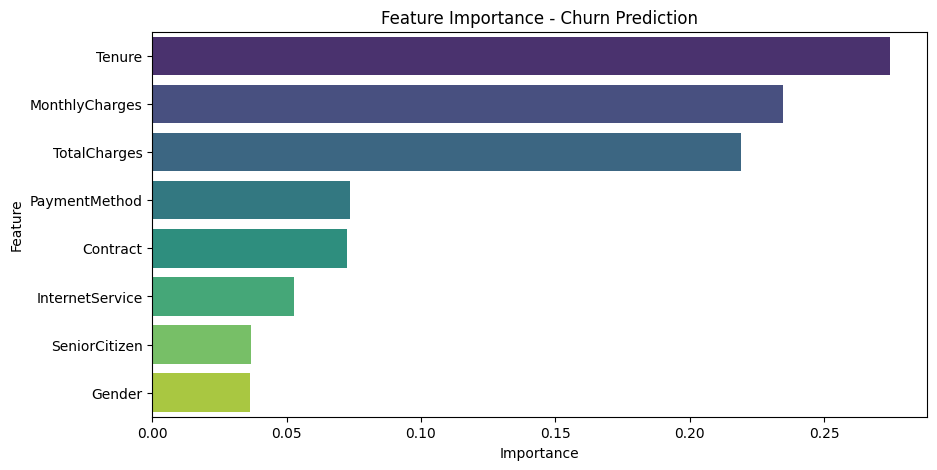


💡 High Churn Risk Groups Analysis:
High Monthly Charges:
Churn
0    29
1    21
Name: count, dtype: int64

Month-to-Month Contracts:
Churn
0    41
1    22
Name: count, dtype: int64

Senior Citizens:
Churn
0    74
1    27
Name: count, dtype: int64


📢 Recommended Retention Strategies:
🛠 High Monthly Charges: Offer loyalty discounts, introduce budget-friendly plans, and provide better service packages.
🛠 Month-to-Month Contracts: Encourage long-term contracts with discounts or perks (e.g., free upgrades, exclusive content).
🛠 Senior Citizens: Provide personalized customer support, introduce senior-friendly plans, and ensure easy-to-use interfaces.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
data = {
    "CustomerID": range(1, 201),
    "Gender": np.random.choice(["Male", "Female"], 200),
    "SeniorCitizen": np.random.choice([0, 1], 200),  # 0 = Not senior, 1 = Senior
    "Tenure": np.random.randint(1, 72, 200),  # Customer tenure in months
    "MonthlyCharges": np.random.uniform(20, 120, 200),  # Monthly bill amount
    "TotalCharges": np.random.uniform(100, 6000, 200),  # Total money spent
    "Contract": np.random.choice(["Month-to-month", "One year", "Two year"], 200),
    "PaymentMethod": np.random.choice(["Electronic check", "Mailed check", "Bank transfer", "Credit card"], 200),
    "InternetService": np.random.choice(["DSL", "Fiber optic", "No"], 200),
    "Churn": np.random.choice(["Yes", "No"], 200, p=[0.3, 0.7])  # 30% churn rate
}
df = pd.DataFrame(data)
label_encoders = {}
for col in ["Gender", "Contract", "PaymentMethod", "InternetService", "Churn"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode categorical features
    label_encoders[col] = le
X = df.drop(["CustomerID", "Churn"], axis=1)
y = df["Churn"]
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")
plt.title("Feature Importance - Churn Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
high_risk_groups = {
    "High Monthly Charges": df[df["MonthlyCharges"] > df["MonthlyCharges"].quantile(0.75)]["Churn"].value_counts(),
    "Month-to-Month Contracts": df[df["Contract"] == 0]["Churn"].value_counts(),  # 0 = Month-to-month (encoded)
    "Senior Citizens": df[df["SeniorCitizen"] == 1]["Churn"].value_counts(),
}

print("\n💡 High Churn Risk Groups Analysis:")
for key, value in high_risk_groups.items():
    print(f"{key}:\n{value}\n")
retention_strategies = {
    "High Monthly Charges": "Offer loyalty discounts, introduce budget-friendly plans, and provide better service packages.",
    "Month-to-Month Contracts": "Encourage long-term contracts with discounts or perks (e.g., free upgrades, exclusive content).",
    "Senior Citizens": "Provide personalized customer support, introduce senior-friendly plans, and ensure easy-to-use interfaces.",
}

print("\n📢 Recommended Retention Strategies:")
for key, strategy in retention_strategies.items():
    print(f"🛠 {key}: {strategy}")